# Trend map creation 01/2020

In [1]:
#Import packages
import flopy
from flopy.utils.triangle import Triangle as Triangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gp
import shutil
import pickle

flopy is installed in /home/valentin/anaconda3/lib/python3.7/site-packages/flopy


In [2]:
exec(open('./trend_fct.py').read())

### Create layer from shp files

In [3]:
#Get shp names
trend_path = './shp/'
trend_list = !ls shp/
trend_list = trend_list[0:24:2]
trend_list

['100.shp',
 '10.shp',
 '110.shp',
 '1.shp',
 '20.shp',
 '30.shp',
 '40.shp',
 '50.shp',
 '60.shp',
 '70.shp',
 '80.shp',
 '90.shp']

In [4]:
#create the layers
layers = []
for trend in trend_list:
    layer = create_grid(trend_path+trend,plot=False)
    layers.append(layer)

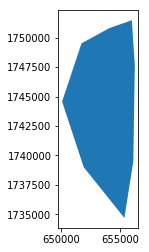

In [5]:
layers[2].plot()

### Create the triangular mesh

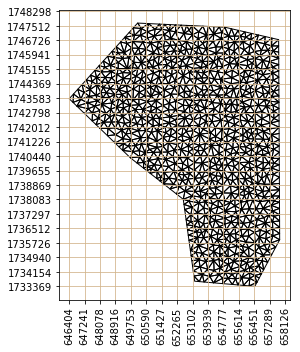

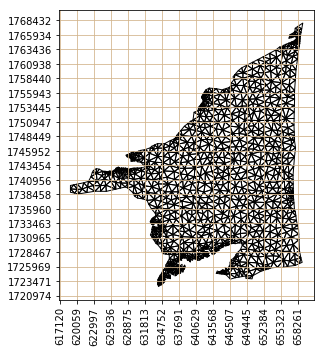

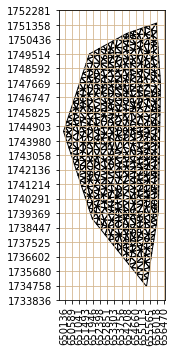

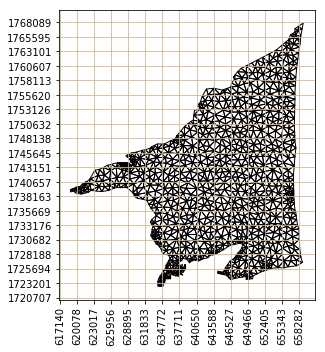

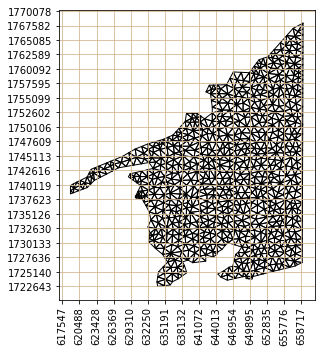

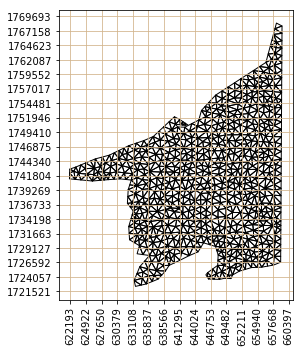

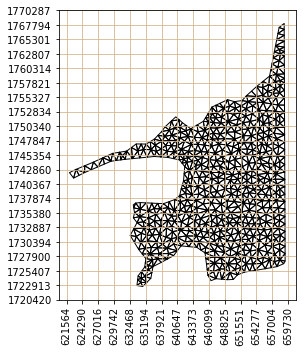

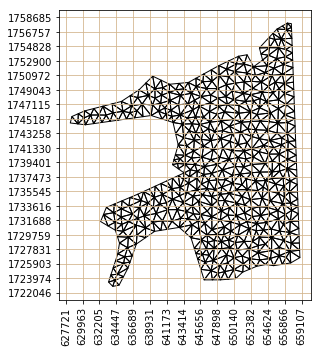

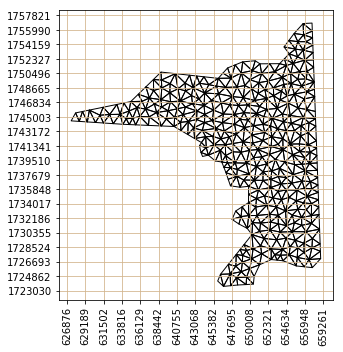

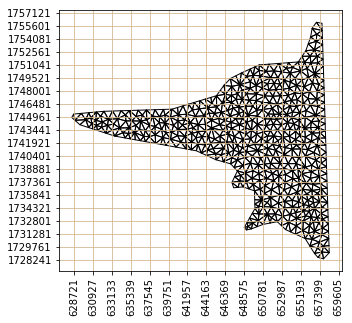

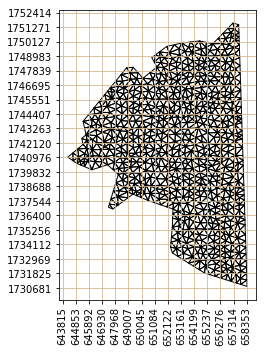

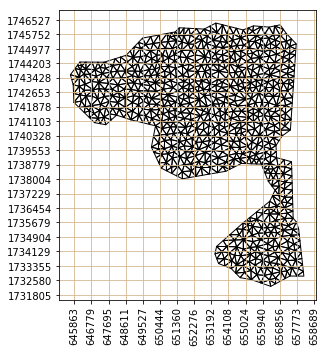

In [6]:
#Max area for triangular cell for each layer
max_area = [100000, 1000000, 100000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 500000, 200000, 100000]
layers_pts, grids = [], []
for i, layer in enumerate(layers):
    layer_pts, grid  = create_mesh(layer, max_area=max_area[i], saveFig=False)
    layers_pts.append(layer_pts)
    grids.append(grid)

### Create the boundary condition define by zones

In [7]:
hd0 =  [[[656200,658000,1730000,1748000]],
[[658200,660000,1726000,1728400],[655300,660000,1728400,1763400],[658200,660000,1763400,1770000]],
[[655000,660000,1733000,1750400],[655550,660000,1450400,1753000]],
[[658200,660000,1726000,1728400],[655300,660000,1728400,1763400],[658200,660000,1763400,1770000]],
[[656500,660000,1720000,1770000]],
[[657600,665000,1720000,1770000]],
[[658000,659900,1720000,1770000]],
[[657000,660000,1727000,1760000]],
[[656950,660000,1726690,1760000]],
[[657000,660000,1720000,1760000]],
[[657500,660000,1720000,1760000]],
[[657000,660000,1733000,1738800],[656500,657000,1738800,1741000],[656856,660000,1741000,1750000]]]

hd1 = [[[646000,653600,1730000,1747500]],
[[643500,660000,1720000,1726000],[610000,649500,1720000,1735900],[610000,634700,1735900,1748450]],
[[650000,652600,1737500,1748500]],
[[643500,660000,1720000,1726000],[610000,649500,1720000,1735900],[610000,634700,1735900,1748450]],
[[617000,656500,1720000,1747000]],
[[617000,657600,1720000,1747000]],
[[643300,658000,1720000,1726000],[620000,637900,1720000,1748000]],
[[645000,657000,1720000,1727000],[620000,638000,1720000,1748000]],
[[620000,656950,1720000,1748500]],
[[620000,651000,1720000,1746480]],
[[640000,653000,1733000,1748000]],
[[653000,654500,1730000,1735500],[640000,650500,1738000,1744900]]]

In [9]:
chlists = []
for i, pts in enumerate(layers_pts):
    hdList = [hd0[i],hd1[i]]
    chlist = define_cst_heads(pts, grids[i], zones_list=hdList)
    chlists.append(chlist)

44
56


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


51
317


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


89
31


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


47
220


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


39
103


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


39
78


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


39
65


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


33
52


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


27
59


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


36
60


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


41
53


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


36
44


What is the value of the cst head group 0 ? 0
What is the value of the cst head group 1 ? 1


### Run the simulations

In [10]:
heads  = [] 
trends = []
mask_path = '../../../99_Data/roussillon/mask/mask2D.pickle'
with open(mask_path,'rb')as file:
    mask = pickle.load(file)
for i, ch in enumerate(chlists):
    run_simulation(grids[i],ch)
    head = get_head()
    heads.append(head)
    
    trend = mf_to_geone(grids[i], head, mask)
    trends.append(trend)

Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True
Simulation is a success ? : True


### We can vizualize the results

(643515.2175208519, 659091.383045549, 1729751.3968820176, 1752628.870256537)

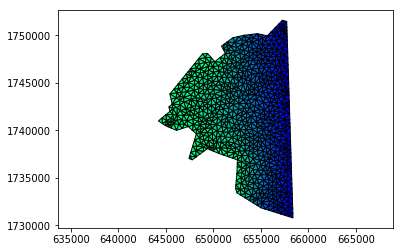

In [11]:
i = 10
grids[i].plot(a=heads[i][0,0,:], cmap='winter')
plt.axis('equal')

### Create the Img trend object

In [12]:
#we re-organise the order of the layer
order = [3,1,4,5,6,7,8,9,10,11,0,2]
trend_maps = []
for i in range(len(trends)):
    trend_maps.append(trends[order[i]])

In [13]:
mask_path = '../../../99_Data/roussillon/mask/mask3D_transfo.pickle'
with open(mask_path,'rb')as file:
    mask3D = pickle.load(file)

In [15]:
#We assigne the same trend layer to 10 layers and than choose the next one
trend_map = np.ones(mask3D.val.shape)*-99
for i in range(12):
    for j in range(10):
        trend_map[0,j+i*10,:,:] = trend_maps[i].val[0,0,:,:]

In [29]:
#We create the Img object
trend_map[mask3D.val==0]='nan'
trendMap = img.Img(nx=407,ny=504,nz=275, 
                sx=1,sy=1,sz=2, 
                ox=mask3D.ox,oy=mask3D.oy,oz=mask3D.oz,
                nv=1,v=trend_map)

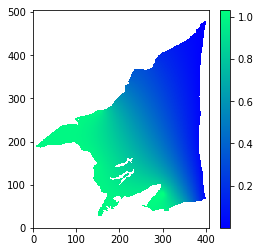

In [30]:
i=1
imgplt.drawImage2D(trendMap,cmap='winter',iz=i)

In [31]:
#Store the result
with open('trend3D.pickle','wb')as file:
    pickle.dump(trend_map, file, pickle.HIGHEST_PROTOCOL)